In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
import joblib
import warnings

warnings.filterwarnings('ignore')


In [ ]:
data_path = '/content/drive/MyDrive/Recruitment/loan_data.csv'
df = pd.read_csv(data_path)

In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
print(df.head())

print(df.info())

print(df.describe())

print(df.isnull().sum())

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

In [ ]:
df.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,...,pub.rec,not.fully.paid,TotalIncome,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,...,-0.054243,-0.158119,-0.008860,-0.025412,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,...,0.098162,0.159552,0.039003,-0.124000,-0.042109,0.123607,-0.019618,-0.050697,-0.068978,0.151247
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,...,-0.032760,0.049955,0.312877,-0.203103,0.000774,0.161658,-0.094510,0.023024,-0.079836,0.145654
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,...,0.016506,-0.033439,0.776930,-0.080077,0.072942,-0.026214,-0.119799,0.116375,-0.031020,0.091540
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,...,0.006209,0.037362,-0.109705,-0.125825,0.084476,0.179149,-0.035325,-0.092788,-0.077719,-0.069245
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,...,-0.147592,-0.149666,0.086194,0.067184,-0.012512,-0.154132,-0.013012,0.097474,0.067129,0.063292
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,...,0.071826,-0.029237,0.220978,-0.056574,0.046220,-0.009318,-0.042621,0.068087,-0.020561,0.034883
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,...,-0.031010,0.053699,0.353235,-0.067728,0.072316,0.005785,-0.034743,0.003258,-0.062395,0.083069
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,...,0.066717,0.082088,0.017973,-0.138535,0.091321,0.211869,-0.053128,-0.114449,-0.108079,-0.060962
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,...,0.072673,0.149452,0.031746,0.017795,-0.033640,-0.044240,0.024243,0.043827,-0.001445,0.042567


In [ ]:


numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

numerical_transformer = SimpleImputer(strategy='median')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")


Numerical columns: Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')
Categorical columns: Index(['purpose'], dtype='object')


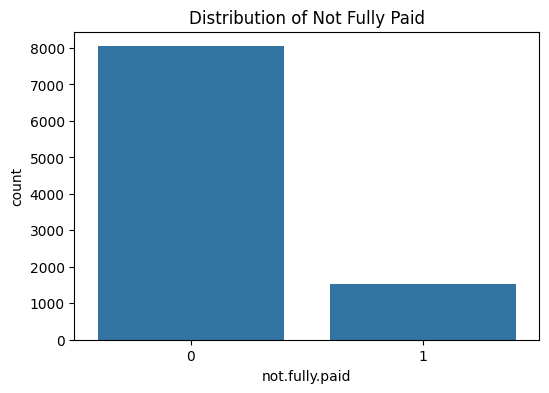

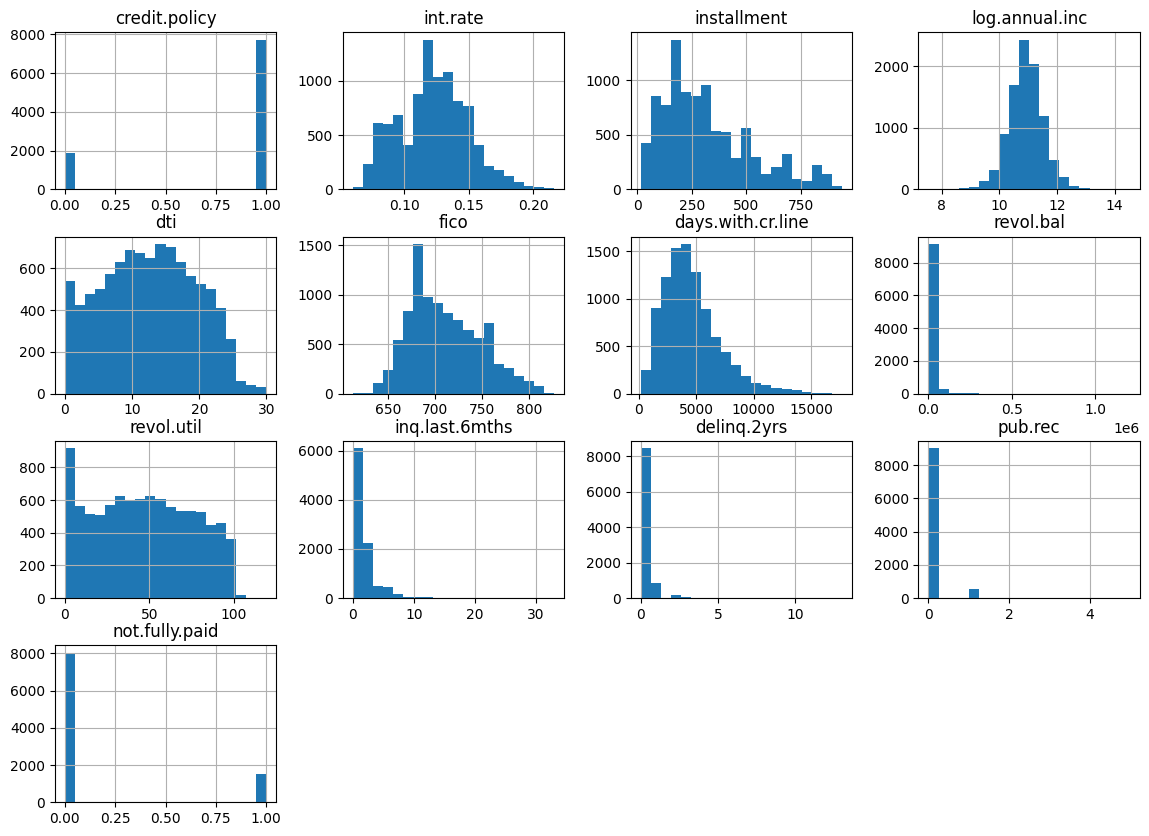

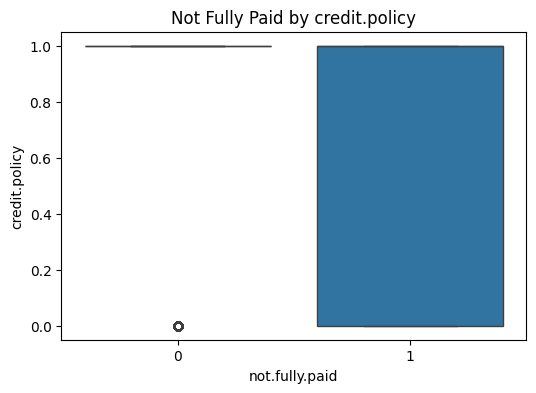

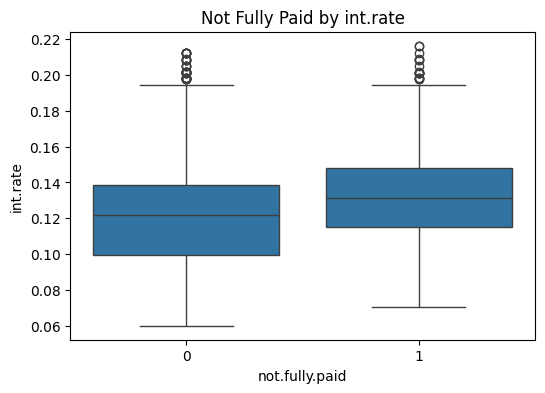

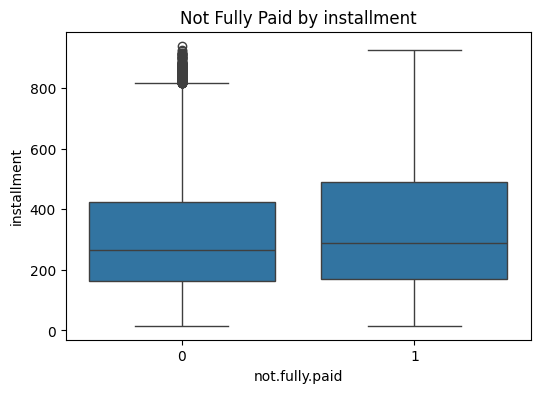

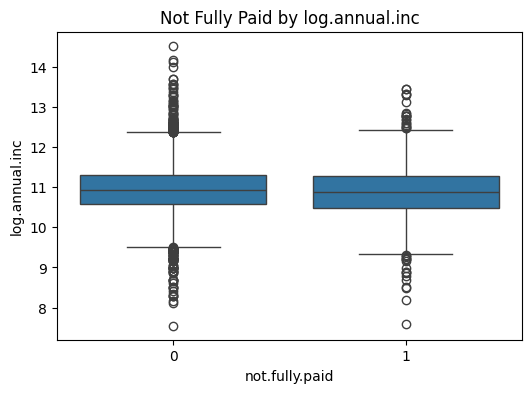

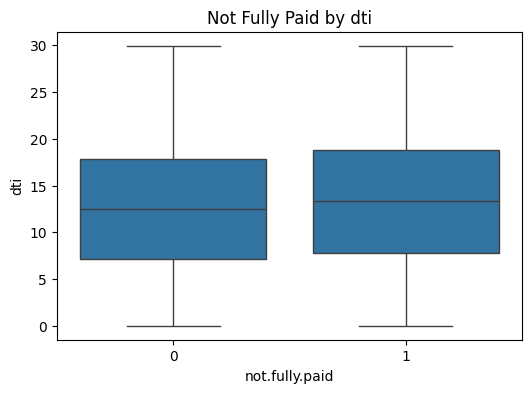

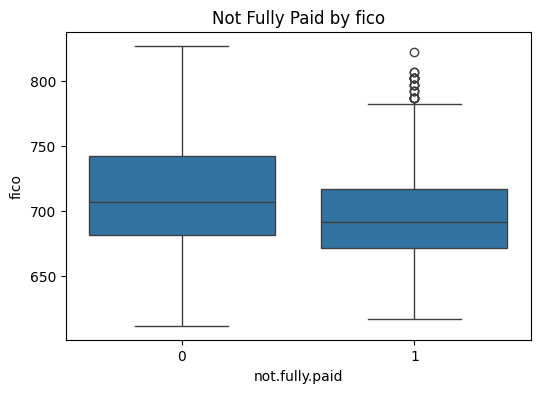

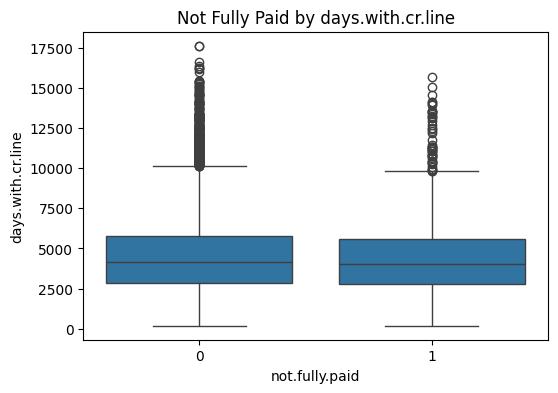

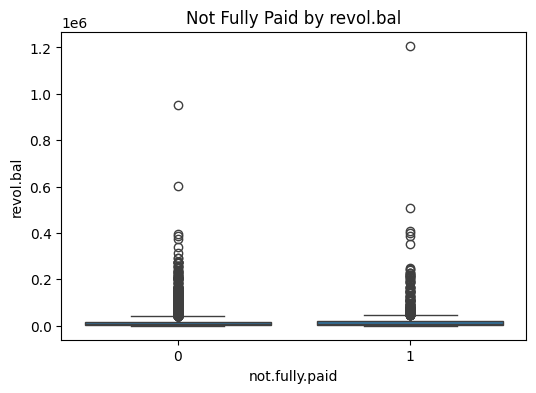

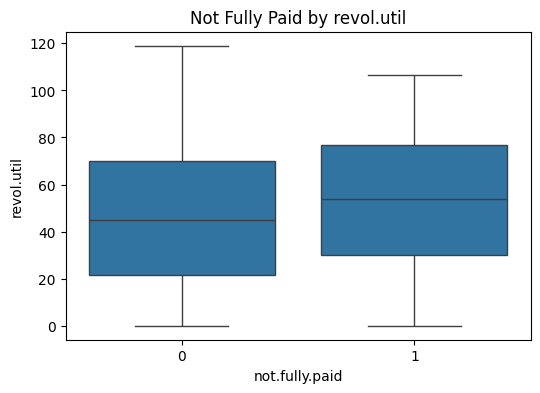

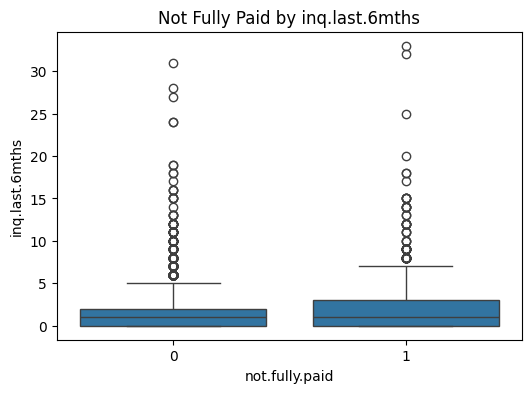

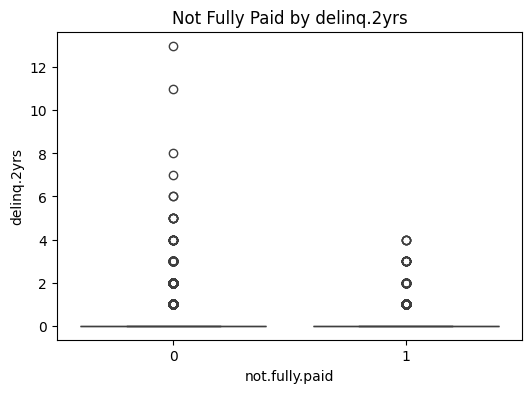

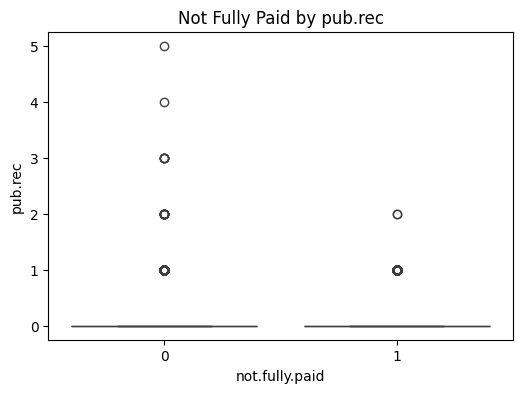

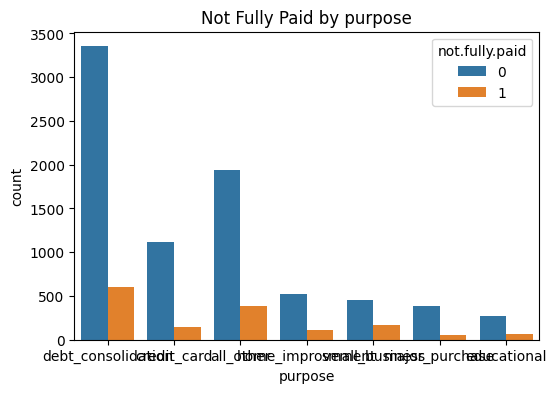

In [ ]:

plt.figure(figsize=(6, 4))
sns.countplot(x='not.fully.paid', data=df)
plt.title('Distribution of Not Fully Paid')
plt.show()

df[numerical_cols].hist(bins=20, figsize=(14, 10))
plt.show()

for col in numerical_cols:
    if col != 'not.fully.paid':
        plt.figure(figsize=(6, 4))
        sns.boxplot(x='not.fully.paid', y=col, data=df)
        plt.title(f'Not Fully Paid by {col}')
        plt.show()

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='not.fully.paid', data=df)
    plt.title(f'Not Fully Paid by {col}')
    plt.show()


In [ ]:

df['TotalIncome'] = np.exp(df['log.annual.inc'])

print(df[['log.annual.inc', 'TotalIncome']].head())

   log.annual.inc   TotalIncome
0       11.350407  85000.000385
1       11.082143  65000.000073
2       10.373491  31999.999943
3       11.350407  85000.000385
4       11.299732  80799.999636


In [ ]:
one_hot = pd.get_dummies(df['purpose'], prefix='purpose')
df = df.drop('purpose', axis=1)
df = pd.concat([df, one_hot], axis=1)

print(df.head())


   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  ...  pub.rec  \
0        5639.958333      28854        52.1               0  ...        0   
1        2760.000000      33623        76.7               0  ...        0   
2        4710.000000       3511        25.6               1  ...        0   
3        2699.958333      33667        73.2               1  ...        0   
4        4066.000000       4740        39.5               0  ...        0   

   not.fully.paid   TotalIncome  purpose_all_other  purpose_credit_card  \
0               0  85000.0003

In [ ]:
from sklearn.preprocessing import StandardScaler


numerical_cols = ['int.rate', 'installment', 'dti', 'fico', 'days.with.cr.line',
                  'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs',
                  'pub.rec', 'TotalIncome']


scaler = StandardScaler()


df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())


   credit.policy  int.rate  installment  log.annual.inc       dti      fico  \
0              1 -0.139318     2.463099       11.350407  0.998505  0.688825   
1              1 -0.578868    -0.438854       11.082143  0.244540 -0.101303   
2              1  0.486484     0.230708       10.373491 -0.141885 -0.759742   
3              1 -0.813544    -0.757022       11.350407 -0.654697  0.030385   
4              1  0.743509    -1.043992       11.299732  0.343326 -1.154806   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  ...   pub.rec  \
0           0.432230   0.353732    0.182704       -0.716989  ... -0.237003   
1          -0.721230   0.495018    1.030602       -0.716989  ... -0.237003   
2           0.059770  -0.397073   -0.730683       -0.262470  ... -0.237003   
3          -0.745277   0.496321    0.909966       -0.262470  ... -0.237003   
4          -0.198161  -0.360663   -0.251586       -0.716989  ... -0.237003   

   not.fully.paid  TotalIncome  purpose_all_other  purpo

In [ ]:

X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']


In [ ]:


y = pd.to_numeric(y)

X = X.astype(float)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.409770
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         not.fully.paid   No. Observations:                 9578
Model:                          Logit   Df Residuals:                     9558
Method:                           MLE   Df Model:                           19
Date:                Fri, 12 Jul 2024   Pseudo R-squ.:                 0.06820
Time:                        03:27:42   Log-Likelihood:                -3924.8
converged:                       True   LL-Null:                       -4212.0
Covariance Type:            nonrobust   LLR p-value:                1.216e-109
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
credit.policy                 -0.3261      0.084     -3.872      0.000      

In [ ]:
X = X.drop(columns=['int.rate', 'dti'])

In [ ]:

y = pd.to_numeric(y)

X = X.astype(float)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.409812
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         not.fully.paid   No. Observations:                 9578
Model:                          Logit   Df Residuals:                     9560
Method:                           MLE   Df Model:                           17
Date:                Fri, 12 Jul 2024   Pseudo R-squ.:                 0.06810
Time:                        03:30:14   Log-Likelihood:                -3925.2
converged:                       True   LL-Null:                       -4212.0
Covariance Type:            nonrobust   LLR p-value:                5.273e-111
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
credit.policy                 -0.3291      0.084     -3.910      0.000      

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:

log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)

In [ ]:
log_reg.fit(X_train, y_train)

rf_clf.fit(X_train, y_train)

gb_clf.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [ ]:

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

log_reg_metrics = evaluate_model(log_reg, X_test, y_test)

rf_clf_metrics = evaluate_model(rf_clf, X_test, y_test)

gb_clf_metrics = evaluate_model(gb_clf, X_test, y_test)

print(f'Logistic Regression Metrics: {log_reg_metrics}')
print(f'Random Forest Classifier Metrics: {rf_clf_metrics}')
print(f'Gradient Boosting Classifier Metrics: {gb_clf_metrics}')


Logistic Regression Metrics: (0.83785664578984, 0.5, 0.030042918454935622, 0.05668016194331983)
Random Forest Classifier Metrics: (0.8368128044537231, 0.4444444444444444, 0.02575107296137339, 0.0486815415821501)
Gradient Boosting Classifier Metrics: (0.8364648573416841, 0.42857142857142855, 0.02575107296137339, 0.048582995951417)


In [ ]:


smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear']
}

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='f1')
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1')
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='f1')

grid_search_lr.fit(X_train_res, y_train_res)
grid_search_rf.fit(X_train_res, y_train_res)
grid_search_gb.fit(X_train_res, y_train_res)

best_lr = grid_search_lr.best_estimator_
best_rf = grid_search_rf.best_estimator_
best_gb = grid_search_gb.best_estimator_

In [ ]:
best_lr_metrics = evaluate_model(best_lr, X_test, y_test)

best_rf_metrics = evaluate_model(best_rf, X_test, y_test)

best_gb_metrics = evaluate_model(best_gb, X_test, y_test)

print(f'Improved Logistic Regression Metrics: {best_lr_metrics}')
print(f'Improved Random Forest Classifier Metrics: {best_rf_metrics}')
print(f'Improved Gradient Boosting Classifier Metrics: {best_gb_metrics}')


Improved Logistic Regression Metrics: (0.7258176757132916, 0.27823691460055094, 0.4334763948497854, 0.3389261744966443)
Improved Random Forest Classifier Metrics: (0.8030619345859429, 0.3188405797101449, 0.1888412017167382, 0.23719676549865226)
Improved Gradient Boosting Classifier Metrics: (0.8124565066109951, 0.3165829145728643, 0.1351931330472103, 0.18947368421052632)


In [ ]:

log_reg_cv = cross_val_score(log_reg, X, y, cv=5)
rf_clf_cv = cross_val_score(rf_clf, X, y, cv=5)
gb_clf_cv = cross_val_score(gb_clf, X, y, cv=5)

print(f'Logistic Regression CV Score: {log_reg_cv.mean()}')
print(f'Random Forest Classifier CV Score: {rf_clf_cv.mean()}')
print(f'Gradient Boosting Classifier CV Score: {gb_clf_cv.mean()}')


Logistic Regression CV Score: 0.7311207530920052
Random Forest Classifier CV Score: 0.7298676529104912
Gradient Boosting Classifier CV Score: 0.7302852984623099


In [ ]:

feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False, inplace=True)
print(feature_importances)


inq.last.6mths                0.168608
int.rate                      0.097502
fico                          0.095183
installment                   0.077159
days.with.cr.line             0.076678
dti                           0.076518
revol.util                    0.075650
revol.bal                     0.071861
log.annual.inc                0.066159
TotalIncome                   0.065252
credit.policy                 0.029743
purpose_all_other             0.016278
purpose_small_business        0.015114
purpose_debt_consolidation    0.014735
delinq.2yrs                   0.014472
purpose_credit_card           0.010565
purpose_home_improvement      0.009146
purpose_educational           0.007332
pub.rec                       0.007239
purpose_major_purchase        0.004806
dtype: float64


In [ ]:

voting_clf = VotingClassifier(estimators=[
    ('lr', best_lr),
    ('rf', best_rf),
    ('gb', best_gb)
], voting='soft')

voting_clf.fit(X_train_res, y_train_res)

voting_metrics = evaluate_model(voting_clf, X_test, y_test)
print(f'Voting Classifier Metrics: {voting_metrics}')


Voting Classifier Metrics: (0.8054975643702157, 0.3271375464684015, 0.1888412017167382, 0.2394557823129252)


In [ ]:

joblib.dump(voting_clf, 'voting_classifier_model.pkl')

joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully.")

Model and scaler saved successfully.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   float64
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   float64
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   float64
 10  delinq.2yrs                 9578 non-null   float64
 11  pub.rec                     9578 non-null   float64
 12  not.fully.paid              9578 non-null   int64  
 13  TotalIncome                 9578 

In [ ]:

voting_clf_loaded = joblib.load('voting_classifier_model.pkl')

scaler = joblib.load('scaler.pkl')

dummy_data = {
    'credit.policy': 1,
    'int.rate': 0.12,
    'installment': 1033333300.0,
    'log.annual.inc': 10.5,
    'dti': 25.0,
    'fico': 700,
    'days.with.cr.line': 5000.0,
    'revol.bal': 20000,
    'revol.util': 60.0,
    'inq.last.6mths': 2,
    'delinq.2yrs': 0,
    'pub.rec': 0,
    'TotalIncome': 30000,
    'purpose_all_other': 0,
    'purpose_credit_card': 1,
    'purpose_debt_consolidation': 0,
    'purpose_educational': 0,
    'purpose_home_improvement': 0,
    'purpose_major_purchase': 0,
    'purpose_small_business': 0
}

new_data = pd.DataFrame([dummy_data])

numerical_cols = ['int.rate', 'installment', 'dti', 'fico', 'days.with.cr.line',
                  'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs',
                  'pub.rec', 'TotalIncome']

new_data[numerical_cols] = scaler.transform(new_data[numerical_cols])

features_for_prediction = new_data  

predictions = voting_clf_loaded.predict(features_for_prediction)

print("Predictions:", predictions)



Predictions: [0]
